LET'S RECAP:

Construct SP using MB Basis -> SP Subspace -> MB Subspace

In [1]:
using PyCall,QuantumOptics,LinearAlgebra,SparseArrays

# Sp Kagome From Python

In [2]:
py"""

import matplotlib.pyplot as plt
import numpy as np
sqrt = np.sqrt
a1_vec = np.array([2,0]);a2_vec = np.array([1,sqrt(3)])
l1 = 3;l2 = 2;L = l1*l2;N = 3*L 
b1=np.array([0,0]);b2=a1_vec/2;b3=a2_vec/2
Basis = [b1,b2,b3]
basis_colors=['red','blue','green']
coordinates = [];sites = [];atom_dict={}
for i1 in range(l1):
    for i2 in range(l2):
        Lp = a1_vec * i1 + a2_vec * i2
        center = a1_vec * i1 + a2_vec * i2 + b1
        shift = (-b2-b3)/sqrt(3)/2
        P1=np.array([center+shift,center+a1_vec+shift,center+a2_vec+shift])
        for ib, b in enumerate(Basis):
            atom_vec = Lp + b
            atom_no = 3 * i1 * l2 + 3 * i2 + ib
            site = [i1,i2,ib]
            sites.append(site)
            coordinates.append(atom_vec)
            atom_dict[tuple(site)]=atom_vec
NN = [[(0,0,1), (0,0,2), (-1,0,1),(0,-1,2),   (-1,0,2), (-1,1,1), (0,-1,1),(1,-1,2)], 
      [(0,0,-1),(0,0,1), (1,0,-1),(1,-1,1),   (0,-1,1), (1,-1,-1),(0,1,-1),(1,0,1)], 
      [(0,0,-1),(0,0,-2),(0,1,-2),(-1,1,-1),  (-1,1,-2),(-1,0,-1),(0,1,-1),(1,0,-2)]
      ]
# t1=L1=-1;t2=L2=0
# t1=L1=0;t2=L2=-1
t1 = -1;L1 = 0.28;t2 = 0.3;L2 = 0.2
# t1=t2=-1;L1=L2=0
hopps = [[t1+1j*L1,t1-1j*L1,t1+1j*L1,t1-1j*L1,  t2+1j*L2,t2-1j*L2,t2-1j*L2,t2+1j*L2], 
         [t1-1j*L1,t1+1j*L1,t1-1j*L1,t1+1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2], 
         [t1-1j*L1,t1+1j*L1,t1+1j*L1,t1-1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2]] 
H = np.zeros([N,N],dtype=complex)
for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H[neighbor_no,atom_no]=hopps[atom_site[2]][i_delta] 

"""

In [3]:
Nx = py"l1";Ny = py"l2";N = py"N";t1 = py"t1";L1 = py"L1";t2 = py"t2";L2 = py"L2"
println("Parameters:")
println("Size of Lattice=",Nx,"X",Ny)
println("Number of Sites=",N)
println("Hopping Amplitudes: t1=",t1,",L1=",L1,",t2=",t2,",L2=",L2)
H = PyArray(py"H"o)

Parameters:
Size of Lattice=3X2
Number of Sites=18
Hopping Amplitudes: t1=-1,L1=0.28,t2=0.3,L2=0.2


18×18 PyArray{ComplexF64, 2}:
  0.0+0.0im   -1.0-0.28im  -1.0+0.28im  …   0.3+0.2im    0.0+0.0im
 -1.0+0.28im   0.0+0.0im   -1.0-0.28im      0.0+0.0im    0.0+0.0im
 -1.0-0.28im  -1.0+0.28im   0.0+0.0im      -1.0+0.28im   0.0+0.0im
  0.0+0.0im    0.3+0.2im   -1.0+0.28im     -1.0-0.28im   0.3-0.2im
  0.3-0.2im    0.0+0.0im    0.3+0.2im       0.0+0.0im    0.0+0.0im
 -1.0-0.28im   0.3-0.2im    0.0+0.0im   …   0.3-0.2im    0.0+0.0im
  0.0+0.0im   -1.0-0.28im   0.3-0.2im       0.0+0.0im    0.3-0.2im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.0+0.0im   -1.0-0.28im
  0.0+0.0im    0.3-0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.3+0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im   …   0.0+0.0im    0.3+0.2im
  0.3+0.2im   -1.0+0.28im   0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.3+0.2im   -1.0+0.28im
 -1.0+0.28im   0.0+0.0im    0.3+0.2im       0.0+0.0im    0.3+0.2im
  0.3+0.2im    0.0+0.0im    0.

In [4]:
eigvals(H)

18-element Vector{Float64}:
 -2.7999999999999994
 -2.7715699522112027
 -2.7683070420017826
 -2.7683070420017812
 -2.757774380143503
 -2.7577743801434993
 -0.14029952547266727
 -0.14029952547266653
  5.39137334129462e-16
  0.3035219724976965
  0.3035219724976971
  1.1228718707889795
  1.6771281292110203
  2.454252407645805
  2.4542524076458054
  2.7715699522111983
  2.9086065674744477
  2.9086065674744486

# SP Kagome

In [5]:
using NBInclude
@nbinclude("(M)_Kagome_SP_Real_Space.ipynb")

Parameters:
Number of Unit-Cells in Each Directions=3X2
Number of Sites=18
Hopping Amplitudes: t1=-1,L1=0.28,t2=0.3,L2=0.2


18×18 PyArray{ComplexF64, 2}:
  0.0+0.0im   -1.0-0.28im  -1.0+0.28im  …   0.3+0.2im    0.0+0.0im
 -1.0+0.28im   0.0+0.0im   -1.0-0.28im      0.0+0.0im    0.0+0.0im
 -1.0-0.28im  -1.0+0.28im   0.0+0.0im      -1.0+0.28im   0.0+0.0im
  0.0+0.0im    0.3+0.2im   -1.0+0.28im     -1.0-0.28im   0.3-0.2im
  0.3-0.2im    0.0+0.0im    0.3+0.2im       0.0+0.0im    0.0+0.0im
 -1.0-0.28im   0.3-0.2im    0.0+0.0im   …   0.3-0.2im    0.0+0.0im
  0.0+0.0im   -1.0-0.28im   0.3-0.2im       0.0+0.0im    0.3-0.2im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.0+0.0im   -1.0-0.28im
  0.0+0.0im    0.3-0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.3+0.2im    0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im   …   0.0+0.0im    0.3+0.2im
  0.3+0.2im   -1.0+0.28im   0.0+0.0im       0.0+0.0im    0.0+0.0im
  0.0+0.0im    0.0+0.0im    0.0+0.0im       0.3+0.2im   -1.0+0.28im
 -1.0+0.28im   0.0+0.0im    0.3+0.2im       0.0+0.0im    0.3+0.2im
  0.3+0.2im    0.0+0.0im    0.

We're going to create again SP Hamiltonian, because we need to construct SP real-space basis in order to create SP subspace.

In [6]:
# Create N Level Basis 
Basis = NLevelBasis(N)

NLevel(N=18)

In [7]:
Hamiltonian_SP = SparseOperator(Basis)
for m in 1:N
    for n in 1:N
        Hamiltonian_SP = Hamiltonian_SP + H[m,n] * transition(Basis, m, n)
    end
end
EigenValues_sp, EigenStates = eigenstates(dense(Hamiltonian_SP))
EigenValues_sp

18-element Vector{Float64}:
 -2.7999999999999976
 -2.7715699522111947
 -2.768307042001782
 -2.768307042001779
 -2.757774380143502
 -2.7577743801434926
 -0.14029952547266986
 -0.14029952547266802
 -2.220446049250313e-15
  0.3035219724976968
  0.3035219724976969
  1.1228718707889784
  1.6771281292110212
  2.4542524076458045
  2.454252407645806
  2.7715699522112
  2.9086065674744477
  2.9086065674744486

# Subspace 

In [8]:
E0, states0 = eigenstates(dense(Hamiltonian_SP))
#SORTING 
sort = sortperm(E0)
E0 = E0[sort]
# It's not necessary

18-element Vector{Float64}:
 -2.7999999999999976
 -2.7715699522111947
 -2.768307042001782
 -2.768307042001779
 -2.757774380143502
 -2.7577743801434926
 -0.14029952547266986
 -0.14029952547266802
 -2.220446049250313e-15
  0.3035219724976968
  0.3035219724976969
  1.1228718707889784
  1.6771281292110212
  2.4542524076458045
  2.454252407645806
  2.7715699522112
  2.9086065674744477
  2.9086065674744486

In [9]:
# Sp initial States band subspace
#states0 = eigenstates(dense(Hamiltonian_SP))[2];Ncut=6
E, states0 = eigenstates(dense(Hamiltonian_SP))
Ncut=6 #subspace size
states = states0[1:Ncut]
#states = states0

# SubspaceBasis( SP Basis, Restricted States)
b_sub = SubspaceBasis(Basis,states)

# projector( Subspace Basis, SP Basis )
P = projector(b_sub, Basis)
Pt = dagger(P)

# projection without using projector operator:
# E, states1 = eigen(dense(Hamiltonian_SP).data)
# P2 = Operator(b_sub, Basis, states1[:,1:Ncut]')

# P==P2 #true

Operator(dim=18x6)
  basis left:  NLevel(N=18)
  basis right: Subspace(superbasis=NLevel(N=18), states:6)
 0.235702-9.3e-15im        0.27175-0.0973927im   …     0.295683-0.158497im
 0.235702+2.13e-15im      0.221193-0.185491im        0.00175449-0.000249778im
 0.235702-6.1e-16im      -3.04e-14-2.2732e-13im        0.328168-0.0696825im
 0.235702+1.489e-14im     -0.27175+0.0973927im         0.295683-0.158497im
 0.235702+1.36e-15im     -0.221193+0.185491im        0.00175449-0.000249778im
 0.235702-1.36e-15im     1.454e-13+1.9943e-13im  …     0.328168-0.0696825im
 0.235702+1.623e-14im      0.27175-0.0973927im        -0.292241+0.157496im
 0.235702+1.074e-14im     0.221193-0.185491im         -0.155774+0.0569759im
 0.235702+5.7e-16im        1.8e-16+2.2235e-13im       -0.324583+0.0696825im
 0.235702-7.89e-15im      -0.27175+0.0973927im        -0.292241+0.157496im
 0.235702-1.204e-14im    -0.221193+0.185491im    …    -0.155774+0.0569759im
 0.235702+7.2e-16im    -1.1888e-13-2.0e-13im          -0.3

In [11]:
using LinearAlgebra

In [12]:
# New SP Subspace Operator
H_sub = P*Hamiltonian_SP*Pt #it includes full of real elements
print(dagger(H_sub)==H_sub) #It is due to numerical error
display(H_sub)
H_sub_H = (H_sub' + H_sub)/2
LinearAlgebra.ishermitian(H_sub_H)

Operator(dim=6x6)
  basis: Subspace(superbasis=NLevel(N=18), states:6)
      -2.8+1.0e-17im    2.5e-16-2.4e-16im  …   -3.4e-16+1.6e-16im
   2.4e-16+2.5e-16im   -2.77157-3.0e-17im     1.819e-14-1.1e-16im
 -3.58e-15+7.0e-17im   -2.9e-16+4.0e-17im      -1.3e-16-1.9e-16im
   2.4e-16-1.1e-16im  -2.82e-15-6.0e-16im     -4.01e-15-1.4e-16im
 5.785e-14+7.0e-17im   -2.9e-16+1.5e-16im       1.1e-16+3.0e-17im
  -3.5e-16-1.0e-16im  1.833e-14+1.0e-17im  …   -2.75777-1.1e-16im

false

true

In [13]:
# Convert H_sub operator into the matrix to apply julia function
H_sub_2 = zeros(Complex{Float64},size(H_sub))
for i in 1:size(H_sub)[1]
    for j in 1:size(H_sub)[2]
        H_sub_2[i,j] = H_sub.data[i,j]
    end
end
# sum(H_sub_2-H_sub_2') # =0
# maximum(abs.(H_sub_2-H_sub_2'))
# HH_sub_2 = imag(H_sub_2);maximum(HH_sub_2) # Maximum imaginary part of H_sub_2 matrix

In [14]:
Nparticles = 2

2

# Hard-Core in the Subspace

Şimdilik Hard-Core doğru değil!

In [12]:
# Subspace MB
states = fermionstates(b_sub, Nparticles)
b_mb = ManyBodyBasis(b_sub, states)
states #reduced MB states

15-element Vector{Vector{Int64}}:
 [1, 1, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [1, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 1]
 [0, 1, 1, 0, 0, 0]
 [0, 1, 0, 1, 0, 0]
 [0, 1, 0, 0, 1, 0]
 [0, 1, 0, 0, 0, 1]
 [0, 0, 1, 1, 0, 0]
 [0, 0, 1, 0, 1, 0]
 [0, 0, 1, 0, 0, 1]
 [0, 0, 0, 1, 1, 0]
 [0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 1, 1]

In [25]:
# WAY 1
# manybodyoperator(BASIS, SP OPERATOR) 
H_MB = manybodyoperator(b_mb, H_sub)
E1, U1 = eigenstates(dense(H_MB))

┌ Warning: The given operator is not hermitian. If this is due to a numerical error make the operator hermitian first by calculating (x+dagger(x))/2 first.
└ @ QuantumOptics C:\Users\Can\.julia\packages\QuantumOptics\baG3x\src\spectralanalysis.jl:30


(ComplexF64[-5.571569952211201 - 1.9337420741319913e-17im, -5.568307042001799 + 2.7297276934738096e-16im, -5.568307042001775 - 1.0113224168840036e-16im, -5.5577743801435044 - 1.1102230246985024e-16im, -5.557774380143499 + 3.380542373809803e-16im, -5.539876994212997 - 1.11022314579386e-16im, -5.5398769942129835 - 3.234446131067381e-16im, -5.536614084003564 + 5.854139721502062e-16im, -5.529344332354712 + 3.3182297629364767e-16im, -5.529344332354701 + 3.163818162852829e-17im, -5.526081422145283 - 1.2490009027692075e-16im, -5.526081422145281 - 2.7755575615628914e-16im, -5.52608142214528 - 1.1102230246251565e-16im, -5.52608142214528 + 0.0im, -5.515548760287 - 5.4748627016725866e-17im], Ket{ManyBodyBasis{Vector{Int64}, SubspaceBasis{Vector{Int64}, NLevelBasis{Int64}, Ket{NLevelBasis{Int64}, Vector{ComplexF64}}, 0x1b99de0bb7072902, UInt64}, 0xf6c282612a637a99, UInt64}, Vector{ComplexF64}}[Ket(dim=15)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=18), states:6), states:15)
      

In [26]:
#FERMIONSTATES SITE OCC. NUM. TEMSİLLERİDİR! AMA BİZ SUBSPACE DURUMLARI TEMSİLLERİNİ ARIYORUZ. BU HARD-CORE'A KARŞILIK GELMİYOR!
#BİZE LAZIM OLAN HARD-CORE HER BİR SUBSPACE DURUMDA BİR PARÇACIK OLMASIDIR!
#ÖRNEK OLARAK BU FERMION DURUMLARDA SAYI YOĞUNLUĞUNA BAKILABİLİR. HER SUBSPACE DURUMDA BİR TANE PARÇACIK HER ZAMAN GELMEDİĞİ GÖRÜLECEKTİR.
#ÖRNEĞİN:
expect(number(b_mb),eigenstates(dense(H_MB))[2][1])

┌ Warning: The given operator is not hermitian. If this is due to a numerical error make the operator hermitian first by calculating (x+dagger(x))/2 first.
└ @ QuantumOptics C:\Users\Can\.julia\packages\QuantumOptics\baG3x\src\spectralanalysis.jl:30


2.0 + 0.0im

In [39]:
println(length(b_sub))
println(length(b_mb))

6
15


In [42]:
# WAY 2
HC_Hamiltonian_MB = SparseOperator(b_mb)
for m in 1:length(b_sub)
    for n in 1:length(b_sub)
        HC_Hamiltonian_MB = HC_Hamiltonian_MB + H_sub.data[m,n] * transition(b_mb, m, n)
    end
end
E2, U2 = eigenstates(dense(HC_Hamiltonian_MB))

┌ Warning: The given operator is not hermitian. If this is due to a numerical error make the operator hermitian first by calculating (x+dagger(x))/2 first.
└ @ QuantumOptics C:\Users\Can\.julia\packages\QuantumOptics\baG3x\src\spectralanalysis.jl:30


(ComplexF64[-5.571569952211201 - 1.9337420741319913e-17im, -5.568307042001799 + 2.7297276934738096e-16im, -5.568307042001775 - 1.0113224168840036e-16im, -5.5577743801435044 - 1.1102230246985024e-16im, -5.557774380143499 + 3.380542373809803e-16im, -5.539876994212997 - 1.11022314579386e-16im, -5.5398769942129835 - 3.234446131067381e-16im, -5.536614084003564 + 5.854139721502062e-16im, -5.529344332354712 + 3.3182297629364767e-16im, -5.529344332354701 + 3.163818162852829e-17im, -5.526081422145283 - 1.2490009027692075e-16im, -5.526081422145281 - 2.7755575615628914e-16im, -5.52608142214528 - 1.1102230246251565e-16im, -5.52608142214528 + 0.0im, -5.515548760287 - 5.4748627016725866e-17im], Ket{ManyBodyBasis{Vector{Int64}, SubspaceBasis{Vector{Int64}, NLevelBasis{Int64}, Ket{NLevelBasis{Int64}, Vector{ComplexF64}}, 0x1b99de0bb7072902, UInt64}, 0xf6c282612a637a99, UInt64}, Vector{ComplexF64}}[Ket(dim=15)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=18), states:6), states:15)
      

In [43]:
# Two ways are equal to each other
E1 == E2

true

----------------

# Bose-Hubbard in the same Subspace

In [15]:
StatesBH = bosonstates(b_sub, Nparticles) 
Basis_MB = ManyBodyBasis(b_sub, StatesBH)
StatesBH
#DIKKAT: BU DURUMLAR ARTIK SITE BAZINDA OLMADIĞIMIZ İÇİN, SUBSPACE DURUMLARINDAKİ OCCUPATION TEMSİLLERİ DEĞİL!
#BUNDAN DOLAYI number OPERATORÜNÜ SUBSPACE'E PROJECT ETMEMİZ VE ONU KULLANMAMIZ LAZIM.

21-element Vector{Vector{Int64}}:
 [2, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0]
 [1, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 1]
 [0, 2, 0, 0, 0, 0]
 [0, 1, 1, 0, 0, 0]
 [0, 1, 0, 1, 0, 0]
 [0, 1, 0, 0, 1, 0]
 [0, 1, 0, 0, 0, 1]
 [0, 0, 2, 0, 0, 0]
 [0, 0, 1, 1, 0, 0]
 [0, 0, 1, 0, 1, 0]
 [0, 0, 1, 0, 0, 1]
 [0, 0, 0, 2, 0, 0]
 [0, 0, 0, 1, 1, 0]
 [0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 2, 0]
 [0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 2]

In [19]:
U=1/1000

NM_MB_Array_Storage = zeros(Complex{Float64},length(Basis_MB),length(Basis_MB),N)
NM_MB_Matrix = zeros(Complex{Float64},length(Basis_MB),length(Basis_MB))
    
NMPs = []
    
# projecting number operator to the regarding to subspace (BİR ÜST HÜCREDEKİ AÇIKLAMA GEREĞİ)
ITT = SparseOperator(Basis_MB)
for m in 1:N
    NM = transition(Basis, m, m)
    NMP = P*NM*Pt
    # Auto (slower)
    #NM_MB_1 = manybodyoperator(Basis_MB, NMP)
    # Manuel (faster)
    NM_MB_2 = SparseOperator(Basis_MB)
    for i in 1:length(b_sub)
        for j in 1:length(b_sub)
            NM_MB_2 = NM_MB_2 + NMP.data[i,j] * transition(Basis_MB, i, j)
        end
    end
    # NM_MB_1 == NM_MB_2 (true)
    
    push!(NMPs,NM_MB_2)
    
    # Convert NM_MB operator into the NM_MB_Matrix matrix to storage all of NM_MB operator according to each m index
    for i in 1:length(Basis_MB)
        for j in 1:length(Basis_MB)
            NM_MB_Matrix[i,j] = NM_MB_2.data[i,j]
        end
    end
    NM_MB_Array_Storage[:,:,m] = NM_MB_Matrix
    # end
    
    ITT = ITT + U/2 * NM_MB_2 * ( NM_MB_2 - identityoperator(Basis_MB) )
end

KT = SparseOperator(Basis_MB)
#IT = SparseOperator(Basis_MB)
for m in 1:length(b_sub)
    #IT = IT + U/2 * number(Basis_MB, m) * ( number(Basis_MB, m) - identityoperator(Basis_MB) ) 
    for n in 1:length(b_sub)
        KT = KT + H_sub.data[m,n] * transition(Basis_MB, m, n)
    end
end
MB_Hamiltonian = KT + ITT
x = MB_Hamiltonian
EEE, UUU = eigenstates(dense((x+dagger(x))/2))
EEE

# SP'de tüm durumlar üzerine proeject ettiğimizde, tüm real-space sonuçları ile uyuşuyor.

171-element Vector{Float64}:
 -5.600611279776562
 -5.572125447747107
 -5.568862127757077
 -5.568862127757076
 -5.5583311116481795
 -5.55833111164816
 -5.543723571467675
 -5.540440903769104
 -5.540440903769098
 -5.537211532913706
 -5.537211532913704
 -5.53714470823612
 -5.529919140550887
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [20]:
# Convert NM_MB_Array_Storage matrix into the operator to calculate expectation values
BL = BR = Basis_MB
index_number_op = 5
T = NM_MB_Array_Storage[:,:,index_number_op]
Op = Operator(BL,BR,T)
index_eig_states = 7
expect(Op,UUU[index_eig_states])

0.16666553736299924 + 7.687588128657428e-19im

U çok küçükken (Band-Gap büyüdüğünde) subspace enerjileri, real-space enerjilerine yakınsar:

Parameters:
Number of Unit-Cells in Each Directions=3X2
Number of Sites=18
Hopping Amplitudes: t1=-1,L1=0.28,t2=0.3,L2=0.2
Parameters:
Number of Particle=2
Number of Unit-Cell=6
Filling Fraction=0.3333333333333333
Parameters:
Amplitude of Lattice Potantiel=0.001
Number of Particle=2
Number of Unit-Cell=6
Filling Fraction=0.3333333333333333


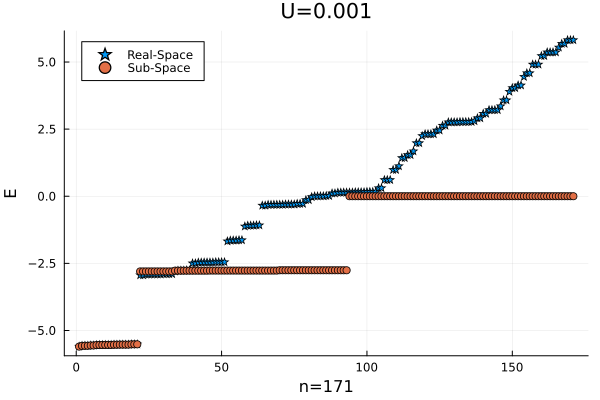

In [21]:
using NBInclude
@nbinclude("Kagome MB .ipynb")
using Plots
real_space_finite_u = yy; sub_space_finite_u = EEE
plot(1:length(real_space_finite_u),real_space_finite_u,seriestype=:scatter,markershape=:star5,label="Real-Space")
plot!(1:length(sub_space_finite_u),sub_space_finite_u,seriestype=:scatter,label="Sub-Space",legend=:topleft)
title!("U=$(U)");xlabel!("n=$(length(EEE))");ylabel!("E")
# NOTE: Dimensions of both elements (yy and EEE) must have equal to each other in different files!